# CS170A -- HW#1 -- assignment and solution form -- Matlab

Your name:  Ryan Trihernawan

Your UID:  904-063-131

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## NOTE:  In this assignment we provide pseudocode to get you started.

In later assignments we will not do this.

# Problem 1:  SVD k-th order approximations (30 points)

If $A$ is a matrix that has SVD $A = U\,S\,V'$,
the <b>rank-k approximation of $A$</b>
keeping only the first $k$ columns of the SVD.

Specifically, given a $n \times p$ matrix $A$ with SVD $A = U\,S\,V'$,
then if $k \leq n$ and $k \leq p$, the rank-$k$ approximation of $A$ is
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V'
$$
where $S^{(k)}$ is the result of setting all diagonal elements to zero after the first $k$ entries
$(1 \leq k \leq p)$.
If $U^{(k)}$ and $V^{(k)}$ are like $U$ and $V$ but with all columns zero after the first $k$, then
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V' ~~=~~ U^{(k)} ~ S^{(k)} ~ V^{(k)'} .
$$


In class, we saw a demo of the attached Matlab script <tt>imagesvdgui.m</tt>
--- and the effectiveness of this approximation in retaining information about an image.

The goal of this problem is to implement this approximation
for black-and-white (grayscale) images.

In [2]:
load mandrill
Mandrill = ind2rgb(X, map);
A = mean( Mandrill, 3 );  % grayscale image -- size 480 x 500.
size(A)

imwrite(A, 'GrayMandrill.bmp')  % Write the Mandrill to a bitmap image file

% The matrix A now contains the Mandrill image (in grayscale)

ans =

   480   500


Display the bitmap image file using an HTML img tag:

<img src="GrayMandrill.bmp">

&lt;img src="GrayMandrill.bmp"&gt;

###  1.(a):  Plot Singular Values of the Rank-$k$ Approximation of an Image

As in HW0, construct a grayscale version of the Mandrill image,
and take one of the 3 color planes as a 500x480 matrix.
This is our `black and white' image $A$.
You are to analyze the rank-k approximation of the image.

Compute the SVD of $A$, and plot the singular values $\sigma_1$, $\sigma_2$, ...

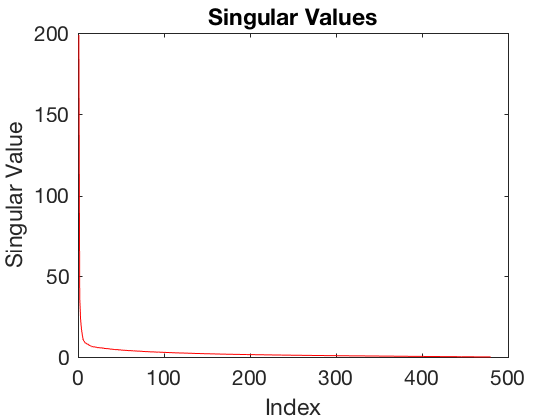

ans =

   1.7884e-12


ans =

   480   500


In [3]:
[U S V] = svd(A);       % U, S, V are now the SVD of A

norm( A - U * S * V' )  %  A should match the product of U, S, V'
size(A)

% Plot singular values
plot(diag(S), 'r') 
title('Singular Values')
xlabel('Index')
ylabel('Singular Value')

###  1.(b):  Optimal Rank-$k$ Approximation of an Image

Find the value of $k$ that minimizes $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~+~ k$.

In [4]:
[n p] = size(A);
maximum_possible_k = min(n,p);

cur_val = realmax;
cur_k = 0;

for k=1:maximum_possible_k
   [Uk Sk Vk] = svds(A,k);
   Ak = Uk * Sk * Vk';
   new_val = norm(A - Ak, 'fro')^2 + k;
   
   if new_val < cur_val
       cur_val = new_val;
       cur_k = k;
   end
end

disp('k for Optimal Rank-k Approximation of A is:')
disp(cur_k)

k for Optimal Rank-k Approximation of A is:
   265


###  1.(c):  The Rank-$k$ Approximation is a Good Approximation

In the chapter on the SVD, the course reader presents a derivation for $A \, - \, A^{(k)}$:
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$

Prove the following:
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$


#### Proof  (Enter your Proof here)
Because
$A \; - \; A^{(k)} ~ = ~ U \; (S ~ - ~ S^{(k)}) \; V'$, then
$(A \; - \; A^{(k)})' ~ = ~ V \; (S ~ - ~ S^{(k)})' \; U'$

As a result, 
$$\begin{eqnarray*}
\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F}
 & = &
tr((A \; - \; A^{(k)})'(A \; - \; A^{(k)}))  \\
 & = &
tr(V \; (S \; - \; S^{(k)})' \; U' \; U \; (S \; - \; S^{(k)}) \; V') \\
 & = &
tr(V \; (S \; - \; S^{(k)})' \; (S \; - \; S^{(k)}) \; V') \\
 & = &
tr(V' \; V \; (S \; - \; S^{(k)})' \; (S \; - \; S^{(k)})) \\
 & = &
tr((S \; - \; S^{(k)})'(S \; - \; S^{(k)}))
\end{eqnarray*}$$

Therefore
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

# Problem 2:  Baseball Visualization (40 points)

For this dataset you are given a matrix of statistics for Baseball players.
You are to perform two kinds of analysis on this matrix.

### Read in the Baseball Statistics

Statistics of top players after the last regular season game,
obtained from MLB.com, October 2016.

In [5]:
%%% Stats = csvread('Baseball_Players_Stats_2016.csv', 1, 0);  # skip the header (= row 0)
%%% Names = csvread('Baseball_Players_Names_2016.csv', 1, 0);

Baseball_Players_2016   %% execute Baseball_Players_2016.m  to load in the data needed here

 added to session magics.



In [6]:
StatNames{1:3}

size(StatNames)

StatNames{:}

ans =

Rank


ans =

G


ans =

AB


ans =

     1    17


ans =

Rank


ans =

G


ans =

AB


ans =

R


ans =

H


ans =

2B


ans =

3B


ans =

HR


ans =

RBI


ans =

BB


ans =

SO


ans =

SB


ans =

CS


ans =

AVG


ans =

OBP


ans =

SLG


ans =

OPS


In [7]:
size(Stats)
Stats(1:3, :)

ans =

   146    17


ans =

  Columns 1 through 7

    1.0000  146.0000  552.0000  104.0000  192.0000   32.0000    8.0000
    2.0000  142.0000  531.0000   88.0000  184.0000   47.0000    5.0000
    3.0000  161.0000  640.0000  108.0000  216.0000   42.0000    5.0000

  Columns 8 through 14

   11.0000   66.0000   66.0000   80.0000   11.0000    7.0000    0.3480
   25.0000  104.0000   35.0000   57.0000    5.0000    3.0000    0.3470
   24.0000   96.0000   60.0000   70.0000   30.0000   10.0000    0.3380

  Columns 15 through 17

    0.4160    0.4950    0.9110
    0.3900    0.5950    0.9850
    0.3960    0.5310    0.9280


In [8]:
size(PlayerNames)
PlayerNames{1:3}

ans =

   146     1


ans =

  LeMahieu D


ans =

  Murphy D


ans =

  Altuve J


### Compute a "scaled" version of the Stats matrix

We scale each column of values ${\bf x}$ in Stats
to be  ${\bf z} = ({\bf x}-\mu)/\sigma$ in ScaledStats,
where $\mu$ is the mean of the ${\bf x}$ values, and $\sigma$ is their standard deviation.

In Octave/Matlab, the function <tt>mean()</tt> computes column means,
and <tt>std()</tt> computes standard deviations.
The function <tt>zscore()</tt> computes both,
and uses them to "scale" each column in this way.

This scaling is also called __normalization__ and __standardization__.
The __z-scores__ ${\bf z} = ({\bf x}-\mu)/\sigma$ are also called
the standardized or normalized values for ${\bf x}$.

In [9]:
ScaledStats  =  zscore(Stats);   %  z  =  (x-mu)/sigma

mean(ScaledStats)  %  the means of each column after normalization should be 0
std(ScaledStats)   %  the standard deviations of each column after normalization should be 1

ans =

   1.0e-14 *

  Columns 1 through 7

   -0.0032    0.0508   -0.1114   -0.0168    0.0262    0.0225   -0.0046

  Columns 8 through 14

   -0.0047    0.0236   -0.0156   -0.0131   -0.0036   -0.0025    0.4593

  Columns 15 through 17

    0.6185   -0.1468    0.7886


ans =

  Columns 1 through 7

    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000

  Columns 8 through 14

    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000    1.0000

  Columns 15 through 17

    1.0000    1.0000    1.0000


### 2 (a):  Random Projections
 
A fundamental problem in data science is that it is impossible to visualize a dataset that has many features.  Given an $n \times p$ dataset (matrix) $A$ in which the number of features $p$ is large, there is no obvious way to plot the data.

_Dimensionality reduction_ algorithms have been developed that attempt to find datasets that have lower values of $p$ but approximate $A$ in some way.  Although there are sophisticated algorithms, a competitive approach is to compute a ___random projection___ of $A$ into a few dimensions.  When the projection is into 2 or 3 dimensions, the result can be visualized.

A ___random $k$-D projection___ of a $n \times p$ dataset (matrix) $A$ is the result $(A \, P)$ of multiplying $A$ on the right by a $p \times k$ matrix $P$ of random values.

The result is a $n \times k$ matrix, assigning each row in $A$ a new pair of values $(x,y)$, and these can be interpreted as positions in a 2D plot.

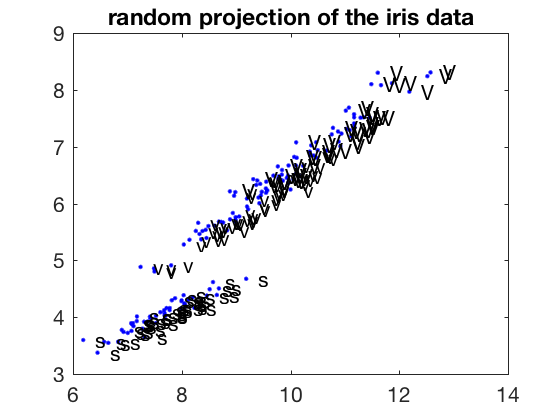

random projection weights:
    0.8147    0.6324
    0.9058    0.0975
    0.1270    0.2785
    0.9134    0.5469


In [10]:
% plotting 2D values
Iris = csvread('iris.csv', 1,0);  % skip over the header line
A = Iris(:, 1:4);  % just the measurement columns
[n p] = size(A);

P = rand(p,2);
disp('random projection weights:')
disp(P)
XY = A * P;
plot(XY(:,1), XY(:,2), 'b.')
title('random projection of the iris data')
species = {'  s', '  v', '  V'};
text(XY(:,1), XY(:,2), species(Iris(:,5)), 'FontSize', 10 )

___Problem:___ write a function <tt>random_projection(A,k)</tt> that, given an input matrix $A$ of size $n \times p$ and an integer $k>0$, produces a random $k$-D projection.

Please use uniform random values in the matrix $P$.

Then:  plot the result of 3 random 2D projections of the data. 

In each plot, identify the ___greatest outlier___ -- the player with $(x,y)$ values that have the largest total $x+y$.  Print the row in the dataset whose projection is this outlier.

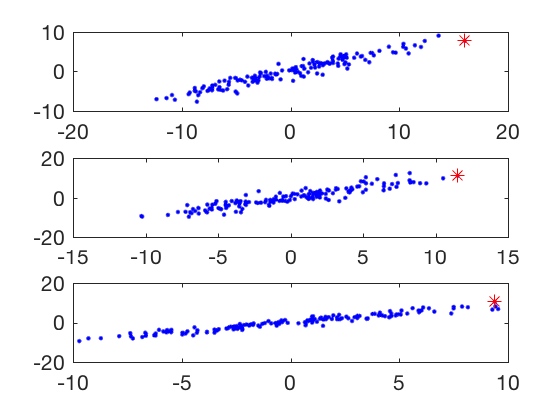

max X+Y 1:
   23.7791

Greatest outlier 1:
    '  Trout M'

            Original     Scaled  
            ________    _________

    Rank       10         -1.5015
    G         159          1.0485
    AB        549       -0.039404
    R         123          2.4622
    H         173         0.91967
    2B         32         0.34058
    3B          5         0.81752
    HR         29         0.68239
    RBI       100          1.0661
    BB        116          2.9758
    SO        137         0.63523
    SB         30          2.1244
    CS          7          1.1605
    AVG     0.315          1.5517
    OBP     0.441          3.1168
    SLG      0.55           1.584
    OPS     0.991          2.3872

max X+Y 2:
   22.4834

Greatest outlier 2:
    '  Trout M'

            Original     Scaled  
            ________    _________

    Rank       10         -1.5015
    G         159          1.0485
    AB        549       -0.039404
    R         123          2.4622
    H         173         0

In [11]:
random_projection = @(A,k) A * rand(size(A,2),k);

figure

for i = 1:3
   XY = random_projection( ScaledStats, 2 );
   
   % plot( something_involving_XY )
   %   % text( something_involving_XY, PlayerNames, 'FontSize', 10 )
   %   text( something_involving_XY, PlayerRanks, 'FontSize', 10 )
   
   subplot(3,1,i)
   plot(XY(:,1), XY(:,2), 'b.')
   
   XplusY = sum(XY,2);
   max_XY = max(XplusY);
   greatest_outlier = (XplusY == max_XY);
   [go_row, go_col] = find(XplusY(:,:) == max_XY);
   
   hold on
   
   plot(XY(go_row,1), XY(go_row,2), 'r*')
   
   OutlierStats = Stats(go_row,:);
   Original = OutlierStats';
   Scaled = ScaledStats(go_row,:)';
   
   Table = table(Original, Scaled, 'RowNames', StatNames);
   
   disp(sprintf('max X+Y %d:', i))
   disp(max_XY)
   
   disp(sprintf('Greatest outlier %d:', i))
   disp(PlayerNames(go_row))
   disp(Table)
end

### 2 (b): Latent Semantic Analysis

The course reader describes __Latent Semantic Indexing__
for a matrix of values measuring association between X terms vs. Y terms.

The classic example is a "term/document matrix" for Keywords vs. Books, shown below.
The code shown produces an LSI plot for the data.

__Your job is to produce an analogous LSI plot for the table of Baseball players.__

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

Some LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

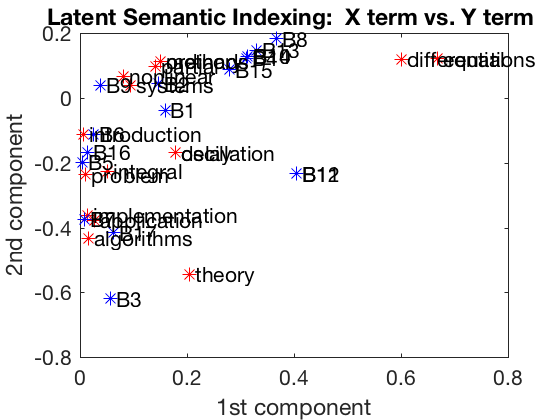

Xfactor =

    0.0159   -0.4317
    0.0266   -0.3756
    0.1785   -0.1692
    0.6014    0.1187
    0.6691    0.1209
    0.0148   -0.3603
    0.0520   -0.2248
    0.0066   -0.1120
    0.1503    0.1127
    0.0813    0.0672
    0.1503    0.1127
    0.1785   -0.1692
    0.1415    0.0974
    0.0105   -0.2363
    0.0952    0.0399
    0.2051   -0.5448


Yfactor =

    0.1591   -0.0377
    0.1477    0.0438
    0.0579   -0.6208
    0.3116    0.1222
    0.0050   -0.1971
    0.0248   -0.1118
    0.0091   -0.3728
    0.3677    0.1830
    0.0390    0.0388
    0.3135    0.1277
    0.4044   -0.2334
    0.4044   -0.2334
    0.3295    0.1466
    0.3135    0.1277
    0.2804    0.0869
    0.0138   -0.1672
    0.0626   -0.4152


In [12]:
% X:  Keywords

nX = 16;
Xtext = {
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        };

% Y:  Books

nY = 17;

% Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
%--------------------------------------------------------------------------
coOccurrence =  [
        0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0;  % algorithms
        0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1;  % application
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % delay
        0  0  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % differential
        1  1  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % equations
        0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0;  % implementation
        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1;  % integral
        0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0;  % introduction
        0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0;  % methods
        0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0;  % nonlinear
        0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0;  % ordinary
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % oscillation
        0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0;  % partial
        0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0;  % problem
        0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0;  % systems
        0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  1;  % theory
];

[U,S,V] = svd(coOccurrence);

%  We can look at a plot of the singular values (diagonal of S):

plot( diag(S), 'b' )

Xfactor = U(:,1:2)
Yfactor = V(:,1:2)

% plot the 2D projection of the data

text_offset = 0.01;
plot( Xfactor(:,1), Xfactor(:,2), 'r*' )
hold on
plot( Yfactor(:,1), Yfactor(:,2), 'b*' )

for i = (1:nX)
     text( Xfactor(i,1)+text_offset, Xfactor(i,2), Xtext(i))
end

for i = (1:nY)
     text( Yfactor(i,1)+text_offset, Yfactor(i,2), sprintf('B%d',i))
end

title( 'Latent Semantic Indexing:  X term vs. Y term ' )
xlabel( '1st component' )
ylabel( '2nd component' )

zoom on
hold off

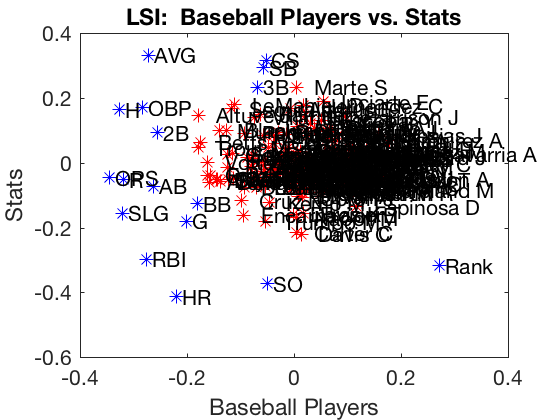

Xfactor =

   -0.1110    0.1786
   -0.1384    0.0990
   -0.1786    0.1471
   -0.1609    0.0022
   -0.1261    0.1015
   -0.1172    0.1677
   -0.1742    0.0641
   -0.0919    0.0919
   -0.1430   -0.0503
   -0.1793    0.0471
   -0.1609   -0.0382
   -0.0632    0.1496
    0.0052    0.2336
   -0.1141    0.0283
    0.0074    0.1112
    0.0116    0.0358
   -0.0164    0.0442
   -0.0476    0.0468
   -0.0281    0.0950
    0.0512    0.1317
    0.0380    0.1063
   -0.0069    0.1668
   -0.1569   -0.0383
   -0.0569    0.0851
   -0.0803   -0.0114
   -0.0778   -0.0094
   -0.1233   -0.0499
   -0.0803    0.0138
   -0.1247    0.0261
   -0.0373    0.0613
   -0.0384   -0.0277
   -0.1571   -0.0586
   -0.0873    0.0178
    0.0183    0.1768
   -0.1136   -0.0476
   -0.0560   -0.0253
   -0.1447   -0.0523
   -0.0003    0.0077
   -0.1244   -0.0127
    0.0546    0.1881
    0.0307    0.1203
   -0.0116   -0.0268
   -0.0756    0.0237
   -0.0101    0.0491
    0.0200    0.1430
   -0.0981   -0.1160
    0.0565    0.0312
  

In [13]:
SS = ScaledStats(:,:);

ss_size = size(SS);
nX = ss_size(1);
nY = ss_size(2);

[U,S,V] = svd(SS);

Xfactor = U(:, 1:2)
Yfactor = V(:, 1:2)

text_offset = 0.01;

plot(Xfactor(:,1), Xfactor(:,2), 'r*')

hold on

plot(Yfactor(:,1), Yfactor(:,2), 'b*')

for i = (1:nX)
    text(Xfactor(i,1) + text_offset, Xfactor(i,2), PlayerNames(i))
end

for i = (1:nY)
    text(Yfactor(i,1) + text_offset, Yfactor(i,2), StatNames(i))
end

title( 'LSI:  Baseball Players vs. Stats' )
xlabel( 'Baseball Players' )
ylabel( 'Stats' )

zoom on
hold off

# Problem 3: Global Warming again  (30 points)

In HW0, you plotted the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

In this problem we want you to fit linear models through the data.

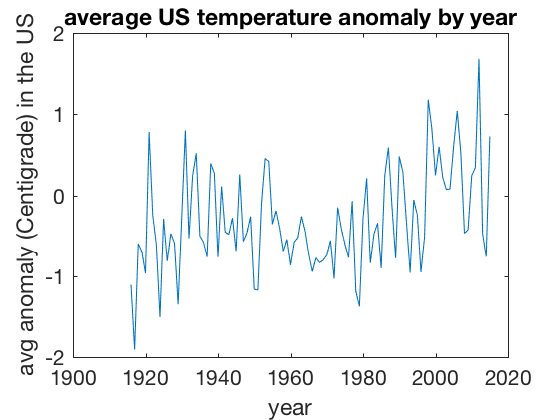

maximum_anomaly_value =

   19.9400


minimum_anomaly_value =

  -24.2600


US_latitude =

     9    10    11    12


US_longitude =

    15    16    17    18    19    20


total_number_of_grid_squares =

   288


N =

   288


In [14]:
% set up everything as in HW#0:

GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;

temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices

missing_values = (temperature_anomaly == -25);
number_of_missing_values = sum(sum(sum(sum( missing_values ))));

maximum_anomaly_value = max(max(max(max( temperature_anomaly ))))
minimum_anomaly_value = min(min(min(min( temperature_anomaly .*  (~ missing_values) ))))  %  '~' is 'not' in MATLAB

US_latitude  = 9:12
US_longitude = 15:20
my_years = 1916:2015;
my_slice = temperature_anomaly( US_latitude, :, my_years - 1880 + 1, US_longitude );

total_number_of_grid_squares = length(US_latitude) * length(US_longitude) * 12
N = total_number_of_grid_squares

average_US_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;

plot( my_years, average_US_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the US')
title('average US temperature anomaly by year')

### (a) Global Average Temperature Anomaly:  Linear Model (Least Squares)

___Problem:___ fit a line through the data, using Least Squares.

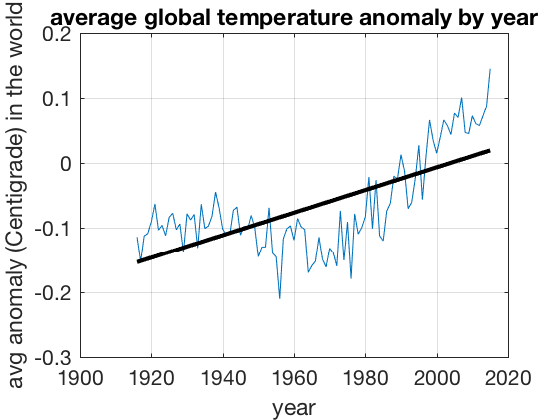

In [18]:
global_temperature_anomaly = temperature_anomaly;
global_temperature_anomaly(missing_values) = 0;
my_years = 1916:2015;
my_slice = global_temperature_anomaly( :, :, my_years - 1880 + 1, : );

total_number_of_grid_squares = length(global_temperature_anomaly(:,1,1,1)) * length(global_temperature_anomaly(1,1,1,:)) * 12;
N = total_number_of_grid_squares;

average_global_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;

plot( my_years, average_global_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the world')
title('average global temperature anomaly by year')

grid on
hold on

X = my_years';
Y = average_global_anomaly_by_year;

% Helper functions
get_new_Y = @(X,Y) [X,ones(size(X))] * ([X,ones(size(X))] \ Y);
get_SSE = @(X,Y) sum(([X,ones(size(X))]*([X,ones(size(X))] \ Y) - Y) .^ 2);

new_Y = get_new_Y(X,Y);

plot(X,new_Y,'k-','LineWidth',2)

### (b) Global Average Temperature Anomaly:  Piecewise Linear Model (Least Squares)

___Problem:___ fit a 2-segment piecewise linear model through the data, using Least Squares.

Specifically, find a pair of least squares models, one from 1916 up to year Y, and one from year Y+1 to 2015, such that the SSE (sum of squared errors) is minimized.


In [16]:
get_my_slice = @(years) global_temperature_anomaly( :, :, years - 1880 + 1, : );
get_average_global_anomaly_by_year = @(years) reshape( sum(sum(sum( get_my_slice(years), 4),2),1), [length(years) 1] ) / N;

min_SSE = realmax;
min_Y = 1917;

for Y = 1917:2013
   years_up_to_Y = 1916:Y;
   years_after_Y = Y+1:2015;
   
   SSE_up_to_Y = get_SSE(years_up_to_Y', get_average_global_anomaly_by_year(years_up_to_Y));
   SSE_after_Y = get_SSE(years_after_Y', get_average_global_anomaly_by_year(years_after_Y));
   total_SSE = SSE_up_to_Y + SSE_after_Y;
   
   if (total_SSE < min_SSE)
      min_SSE = total_SSE;
      min_Y = Y;
   end
end

disp('Year such that SSE is minimized:')
disp(min_Y)

Year such that SSE is minimized:
        1963


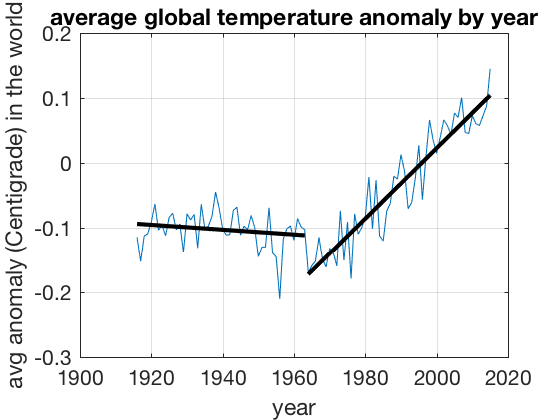

In [17]:
% Plot least squares models

plot( my_years, average_global_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the world')
title('average global temperature anomaly by year')

grid on
hold on

X1 = (1916:min_Y)';
Y1 = get_average_global_anomaly_by_year(X1');
new_Y1 = get_new_Y(X1,Y1);

plot(X1,new_Y1,'k-','LineWidth',2)

X2 = (min_Y+1:2015)';
Y2 = get_average_global_anomaly_by_year(X2');
new_Y2 = get_new_Y(X2,Y2);

plot(X2,new_Y2,'k-','LineWidth',2)